In [2]:
# Data handling and numerical operations
import pandas as pd                                 # Data manipulation and analysis
import numpy as np                                  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt                     # Plotting graphs
import seaborn as sns                               # Advanced data visualization

# Scikit-learn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Utility libraries
%matplotlib inline
# Downloading NLTK resources
# nltk.download('stopwords')\

# Other libraries
from scipy.stats import skew, kurtosis, iqr
import logging

# Setting up the environment
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.dpi'] = 500
sns.set_style("whitegrid", {'axes.grid' : False})
logging.basicConfig(level=logging.WARNING, format='%(asctime)s - %(levelname)s - %(message)s')

In [3]:
df = pd.read_feather("../Data/Data1.feather")

In [4]:
df.head(10)

,text,company_names,sentiment,base_url
0,video offic mind busi david solomon tell gs intern learn wa,goldman sach,0,twitter.com
1,price lumber lb f sinc hit ytd high maci turnaround still happen,maci,0,twitter.com
2,say american dream dead,american,-1,buff.ly
3,barri silbert extrem optimist bitcoin predict new crypto entrant go zero,bitcoin,1,twitter.com
4,satellit avoid attack space junk circl earth paid,oracl,-1,on.forbes.com
5,david butler favorit fang stock realmoneysod alphabet facebook,facebook alphabet alphabet,0,bit.ly
6,miss convo one favorit thinker,harri,0,twitter.com
7,u intellig document nelson mandela made public,intel u,0,reut.rs
8,senat want emerg alert go netflix spotifi etc,netflix,1,tcrn.ch
9,hedg fund manag marc larsi say bitcoin k possibl,bitcoin,0,on.mktw.net


In [5]:
X = df[['text', 'company_names', 'base_url']]
Y = df['sentiment']

In [6]:
le =LabelEncoder()
y = le.fit_transform(Y)
y

array([1, 1, 0, ..., 1, 1, 1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train

,text,company_names,base_url
10341,btc top last h hwc st toa st crpt st exi,essex properti trust,twitter.com
17567,u weekli oil product hit new mileston last week domest crude stockpil unexpectedli rose oott xom,exxon mobil corpor,twitter.com
17695,spi z actual human buyerz left gettin stupid u never short anyth ur life iz,intuit surgic,twitter.com
14735,short interest nrg energi inc nrg declin,nrg energi,theolympiareport.com
9572,extra space storag exr price target increas analyst bank america,extra space storag inc,tickerreport.com
...,...,...,...
11284,innv break news innovu pharma report prelim year yr revenu increas q mil,molson coor brew compani,twitter.com
11964,gden make new high alert buy writeup sent last night,offic depot,twitter.com
5390,lyb max pain matur maxpain option,lyondellbasel industri n v,maximum-pain.com
860,ep wec energi group inc wec expect,wec energi group,reurope.com


In [8]:
# Concatenate text, base_url and company names data with special tag
X_train_combined = X_train['text'] + ' <EOF> ' + X_train['company_names'] + ' <EOF> ' + X_train['base_url']
X_test_combined = X_test['text'] + ' <EOF> ' + X_test['company_names'] + ' <EOF> ' + X_test['base_url']

In [26]:
X_test_combined

20778                      favorit site measur mine profit site find reliabl <EOF> eaton corpor plc <EOF> www.cryptocompare.com
5207                        insid sell republ servic rsg cfo sell share stock <EOF> republ servic <EOF> theenterpriseleader.com
16036                                                                know book valu nok <EOF> nokia corpor <EOF> unicornbay.com
1288                                ih markit info analyst weekli rate chang <EOF> ih markit ltd <EOF> www.mareainformativa.com
2119                                                         hcp max pain matur maxpain option <EOF> hcp <EOF> maximum-pain.com
                                                                  ...                                                          
10959              innv break news innovu pharma report prelim yr yr revenu increas q mil amzn <EOF> autodesk <EOF> twitter.com
8460                                        get latest rate hcp mako qep cbsh ghm inbox marketbeat daili

In [9]:
# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_combined)
X_train_seq = tokenizer.texts_to_sequences(X_train_combined)
X_test_seq = tokenizer.texts_to_sequences(X_test_combined)

In [11]:
# Data preparation
token_lengths = [len(tokens) for tokens in X_train_seq]

# Adjusted descriptive statistics
max_length = np.max(token_lengths)
min_length = np.min(token_lengths)
median_length = np.median(token_lengths)
iqr_length = iqr(token_lengths)
trimmed_mean_length = np.mean(sorted(token_lengths)[int(0.05 * len(token_lengths)):int(0.95 * len(token_lengths))])
data_skewness = skew(token_lengths)
data_kurtosis = kurtosis(token_lengths)

# Print new statistics
print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")
print(f"Median Length: {median_length}")
print(f"IQR: {iqr_length}")
print(f"Trimmed Mean: {trimmed_mean_length}")
print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

Max Length: 1554
Min Length: 5
Median Length: 16.0
IQR: 4.0
Trimmed Mean: 15.97321718780472
Skewness: 86.54586925777988
Kurtosis: 8383.123239809496


/Users/josh/Desktop/Coding 👨🏽‍💻/sentiment_analysis/venv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


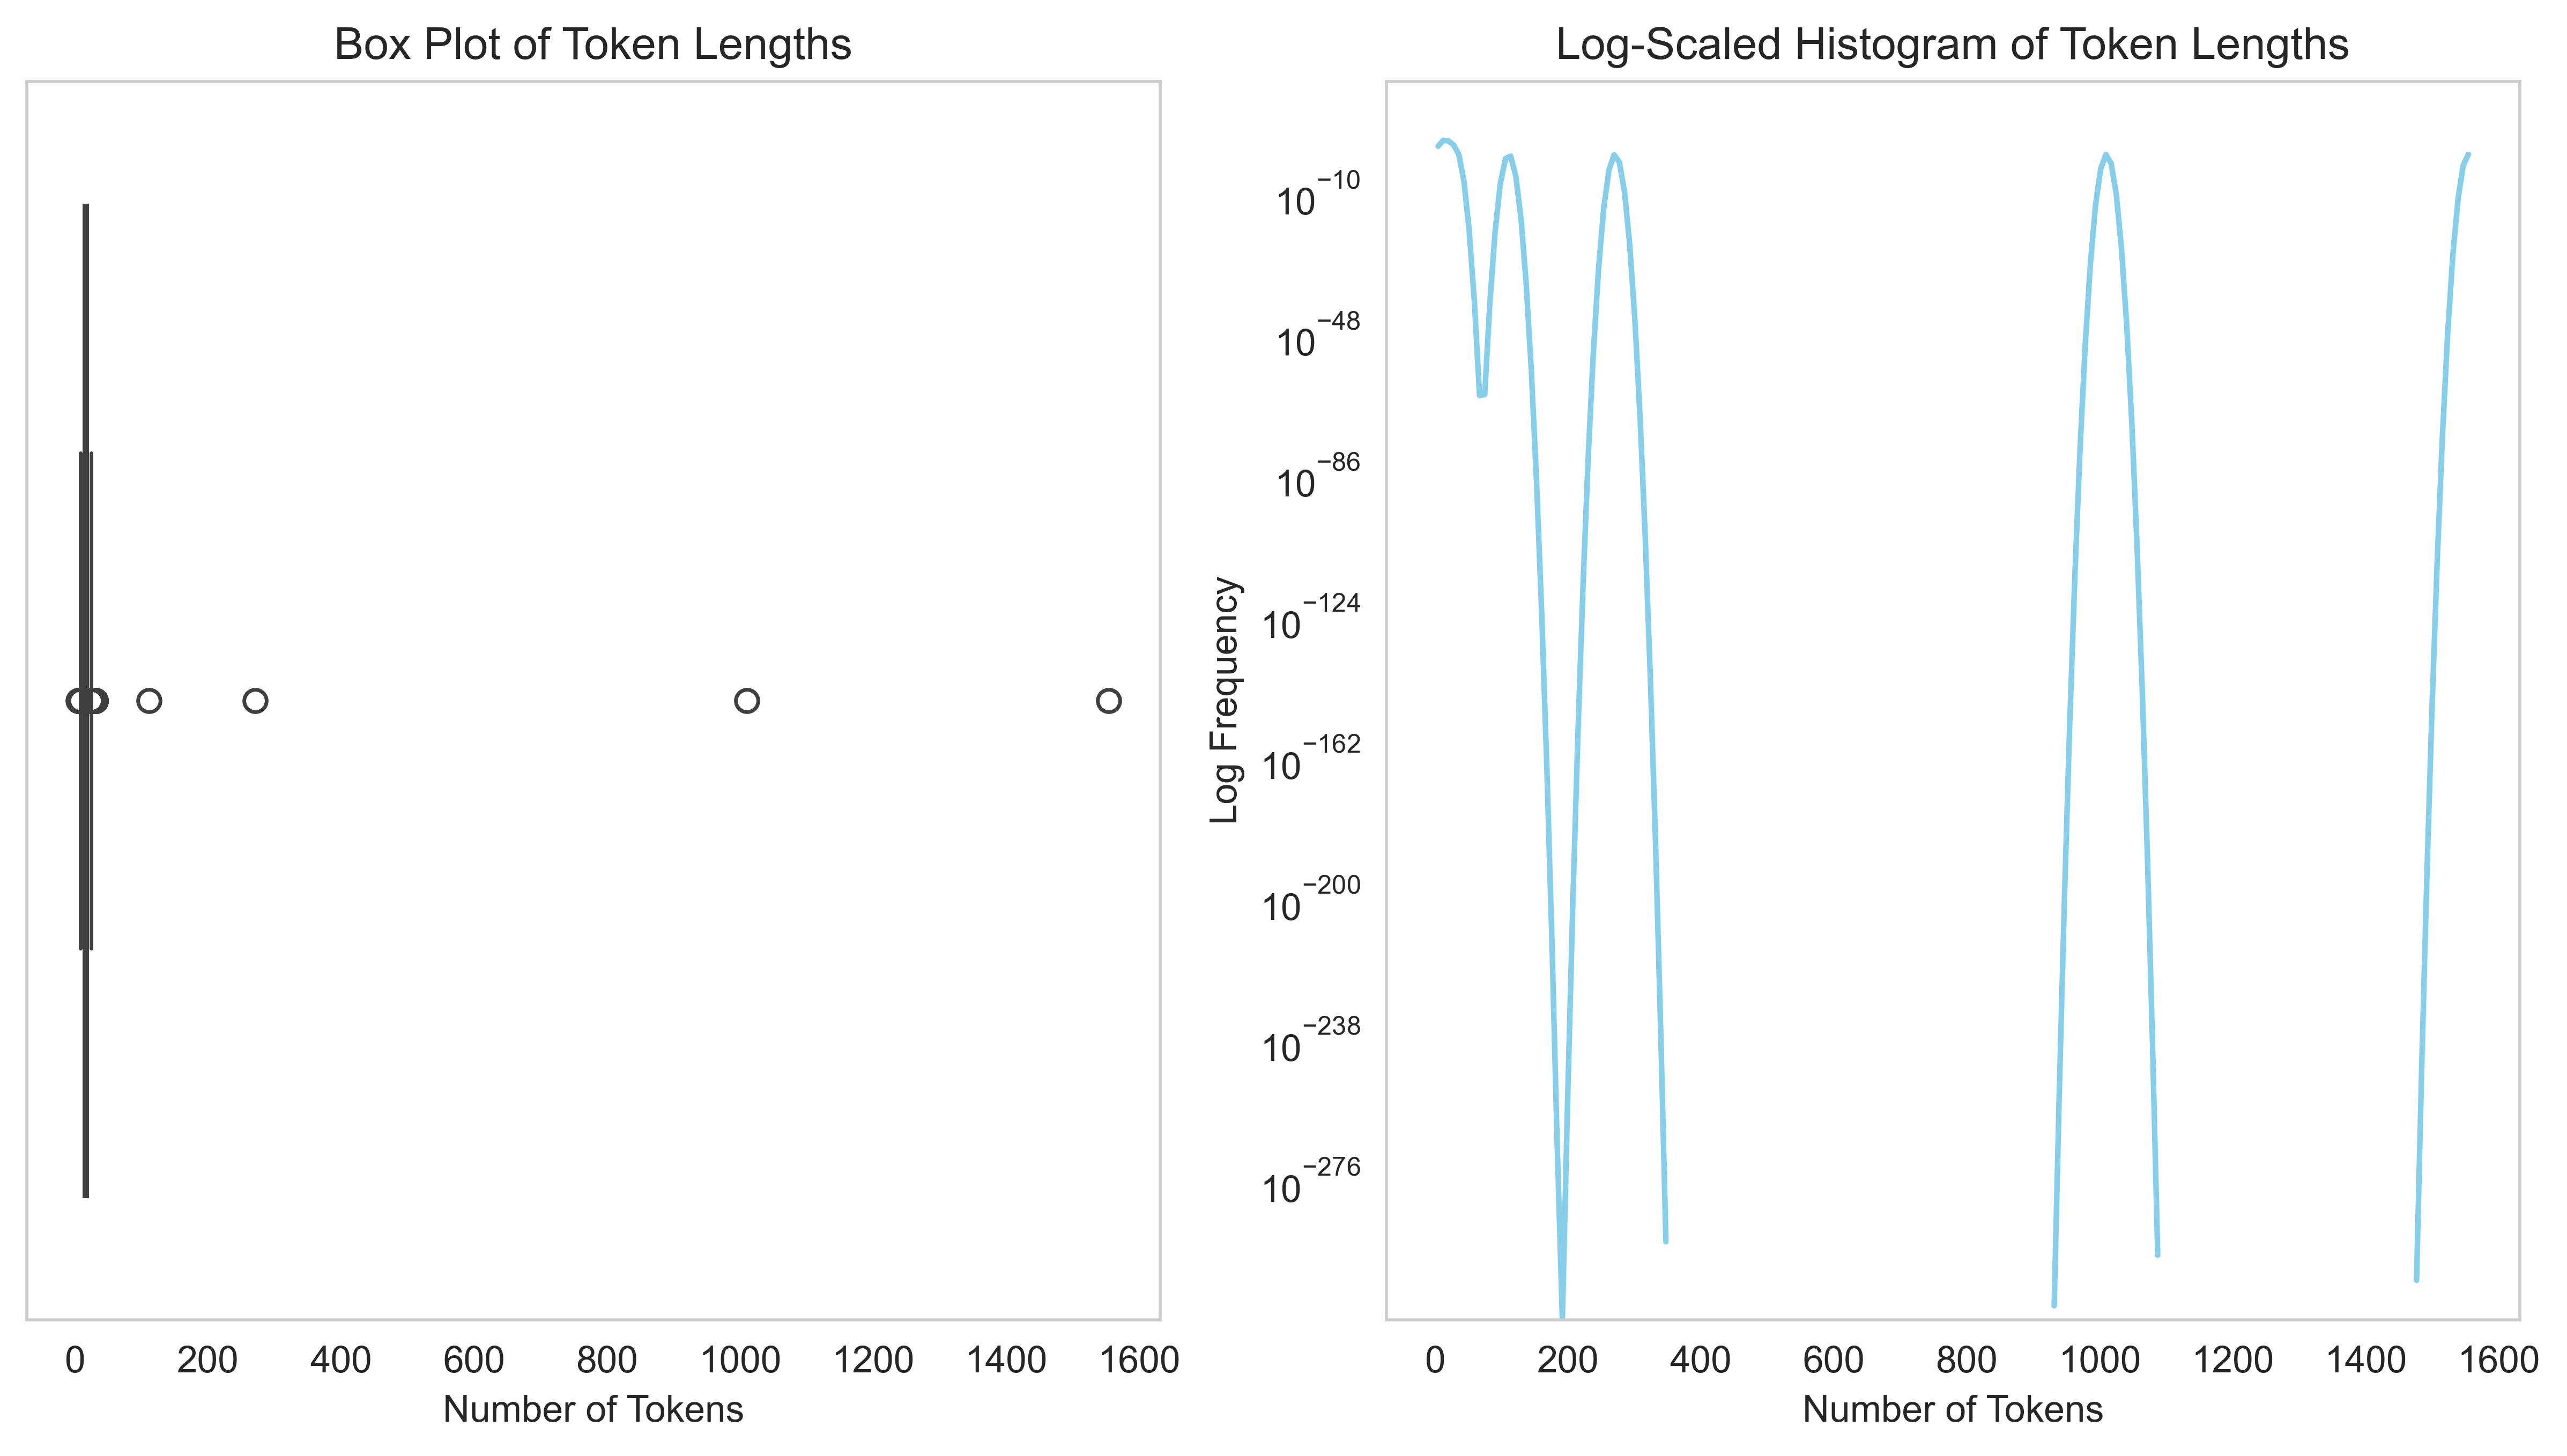

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=token_lengths)
plt.title('Box Plot of Token Lengths')
plt.xlabel('Number of Tokens')

plt.subplot(1, 2, 2)
sns.histplot(token_lengths, bins=30, kde=True, log_scale=(False, True), color='skyblue')
plt.xlabel('Number of Tokens')
plt.ylabel('Log Frequency')
plt.title('Log-Scaled Histogram of Token Lengths')
plt.show()

In [12]:
# max_tokens = int(trimmed_mean_length) + 2 * int(iqr_length)
max_tokens = int(np.mean(token_lengths)) + int(np.std(token_lengths))

print(f"Max Tokens: {max_tokens}")

Max Tokens: 30


In [13]:
max_sequence_length = 30

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='pre')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='pre')
# parameters for LSTM model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
num_classes = len(set(y_train))

In [32]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [33]:

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10


428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7402 - loss: 0.6408 - val_accuracy: 0.9383 - val_loss: 0.1825
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9709 - loss: 0.0862 - val_accuracy: 0.9538 - val_loss: 0.1600
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9880 - loss: 0.0363 - val_accuracy: 0.9608 - val_loss: 0.1650
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9947 - loss: 0.0180 - val_accuracy: 0.9611 - val_loss: 0.1525
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9949 - loss: 0.0184 - val_accuracy: 0.9567 - val_loss: 0.2070
Epoch 6/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9620 - val_loss: 0.1999
Epoch 7/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9965 - loss: 0.0125 - val_accuracy: 0.9669 - val_loss: 0.1994
Epoch 8/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9961 - loss: 0.0144 - val_accuracy: 

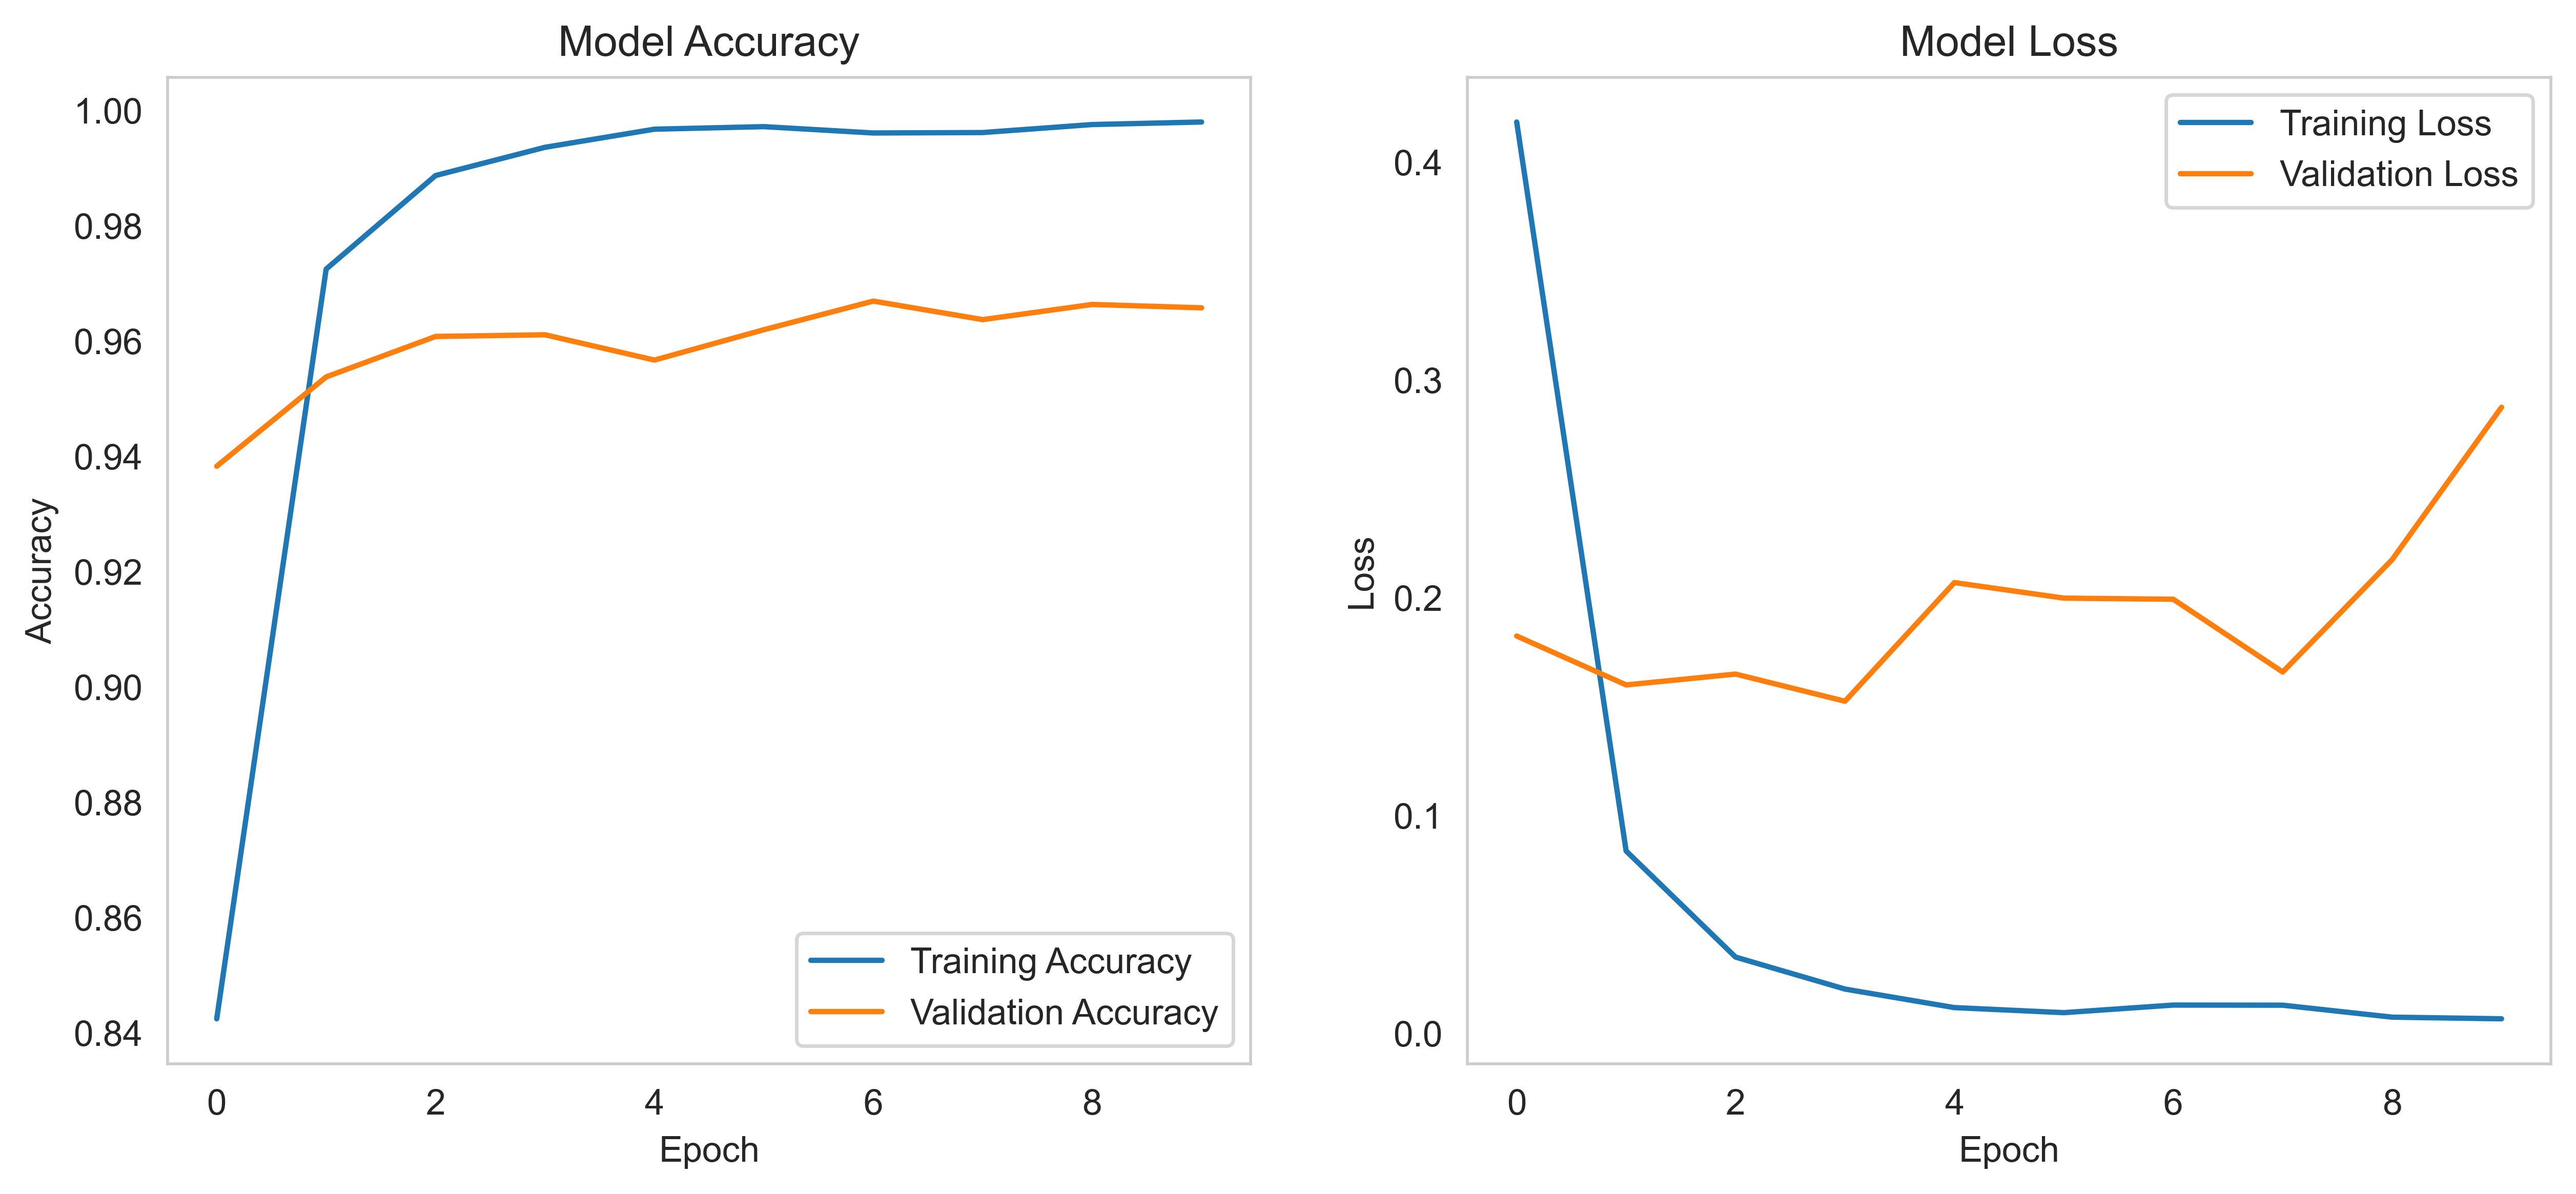

In [35]:
# Model Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [36]:
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([2, 2, 1, ..., 2, 1, 2])

In [37]:
cm_cnn = confusion_matrix(y_test, y_pred_classes)
cm_cnn

array([[ 346,   37,    6],
       [  14, 2530,   40],
       [   1,   43, 1256]])

In [38]:
# printing confusion matrix
def plot_conf_mat(cm):
    class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, labels=[-1,0,1])
    plt.yticks(tick_marks, labels=class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

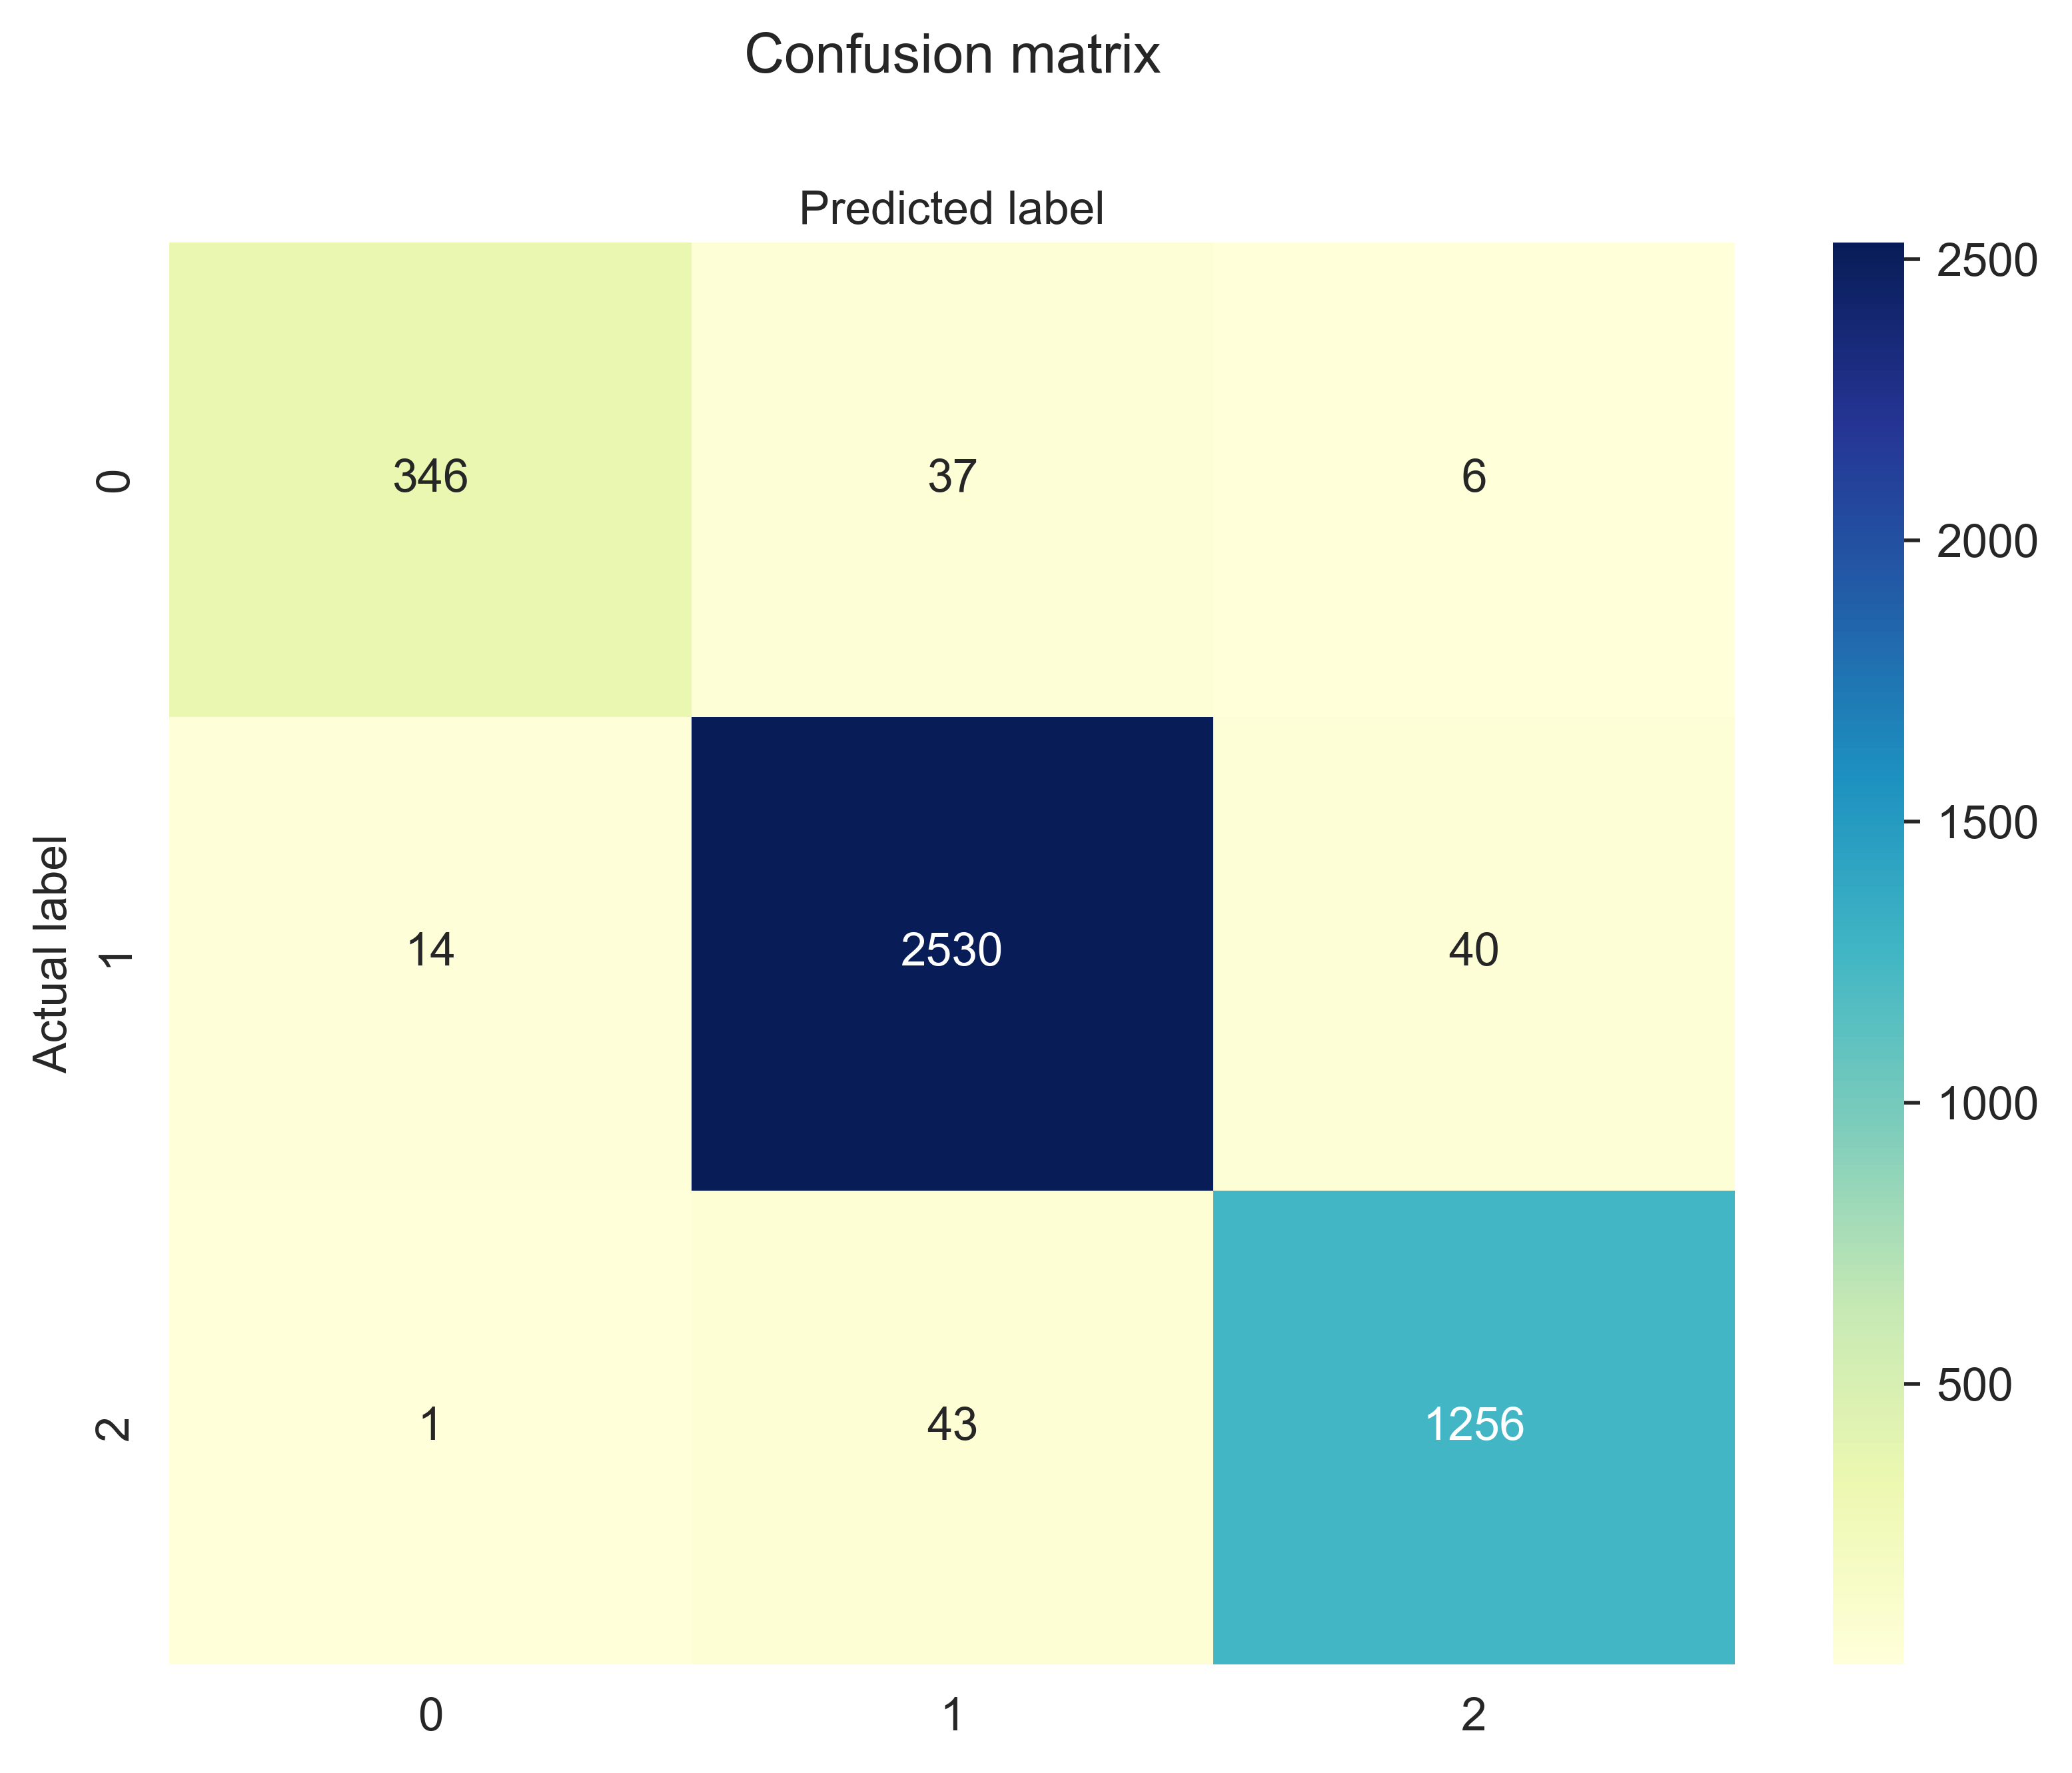

In [39]:
plot_conf_mat(cm_cnn)

In [40]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       389
           1       0.97      0.98      0.97      2584
           2       0.96      0.97      0.97      1300

    accuracy                           0.97      4273
   macro avg       0.96      0.94      0.95      4273
weighted avg       0.97      0.97      0.97      4273



## K-Fold Cross Validation

In [14]:
def create_model():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [15]:
# Define number of folds
k_folds = 10

# Initialize lists to store per-fold histories
fold_accuracies = []
fold_val_accuracies = []
fold_losses = []
fold_val_losses = []

# Initialize KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_pad):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_pad[train_index], X_train_pad[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define and compile model
    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold))

    # Collecting accuracy and loss history
    fold_accuracies.append(history.history['accuracy'])
    fold_val_accuracies.append(history.history['val_accuracy'])
    fold_losses.append(history.history['loss'])
    fold_val_losses.append(history.history['val_loss'])

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7126 - loss: 0.7090 - val_accuracy: 0.9135 - val_loss: 0.2453
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9674 - loss: 0.1088 - val_accuracy: 0.9450 - val_loss: 0.1640
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9887 - loss: 0.0379 - val_accuracy: 0.9550 - val_loss: 0.1664
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9945 - loss: 0.0247 - val_accuracy: 0.9614 - val_loss: 0.1599
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.9955 - loss: 0.0155 - val_accuracy: 0.9596 - val_loss: 0.2084
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9526 - val_loss: 0.2055
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9585 - val_loss: 0.2062
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9983 - loss: 0.0058 - v

In [16]:
# Calculating mean of metrics across all folds
mean_accuracy = np.mean(fold_accuracies, axis=0)
mean_val_accuracy = np.mean(fold_val_accuracies, axis=0)
mean_loss = np.mean(fold_losses, axis=0)
mean_val_loss = np.mean(fold_val_losses, axis=0)

# Printing the mean accuracy and loss
print(f"Mean Training Accuracy: {mean_accuracy[-1]:.6f}")
print(f"Mean Validation Accuracy: {mean_val_accuracy[-1]:.6f}")
print(f"Mean Training Loss: {mean_loss[-1]:.6f}")
print(f"Mean Validation Loss: {mean_val_loss[-1]:.6f}")

Mean Training Accuracy: 0.998394
Mean Validation Accuracy: 0.962848
Mean Training Loss: 0.005819
Mean Validation Loss: 0.211373


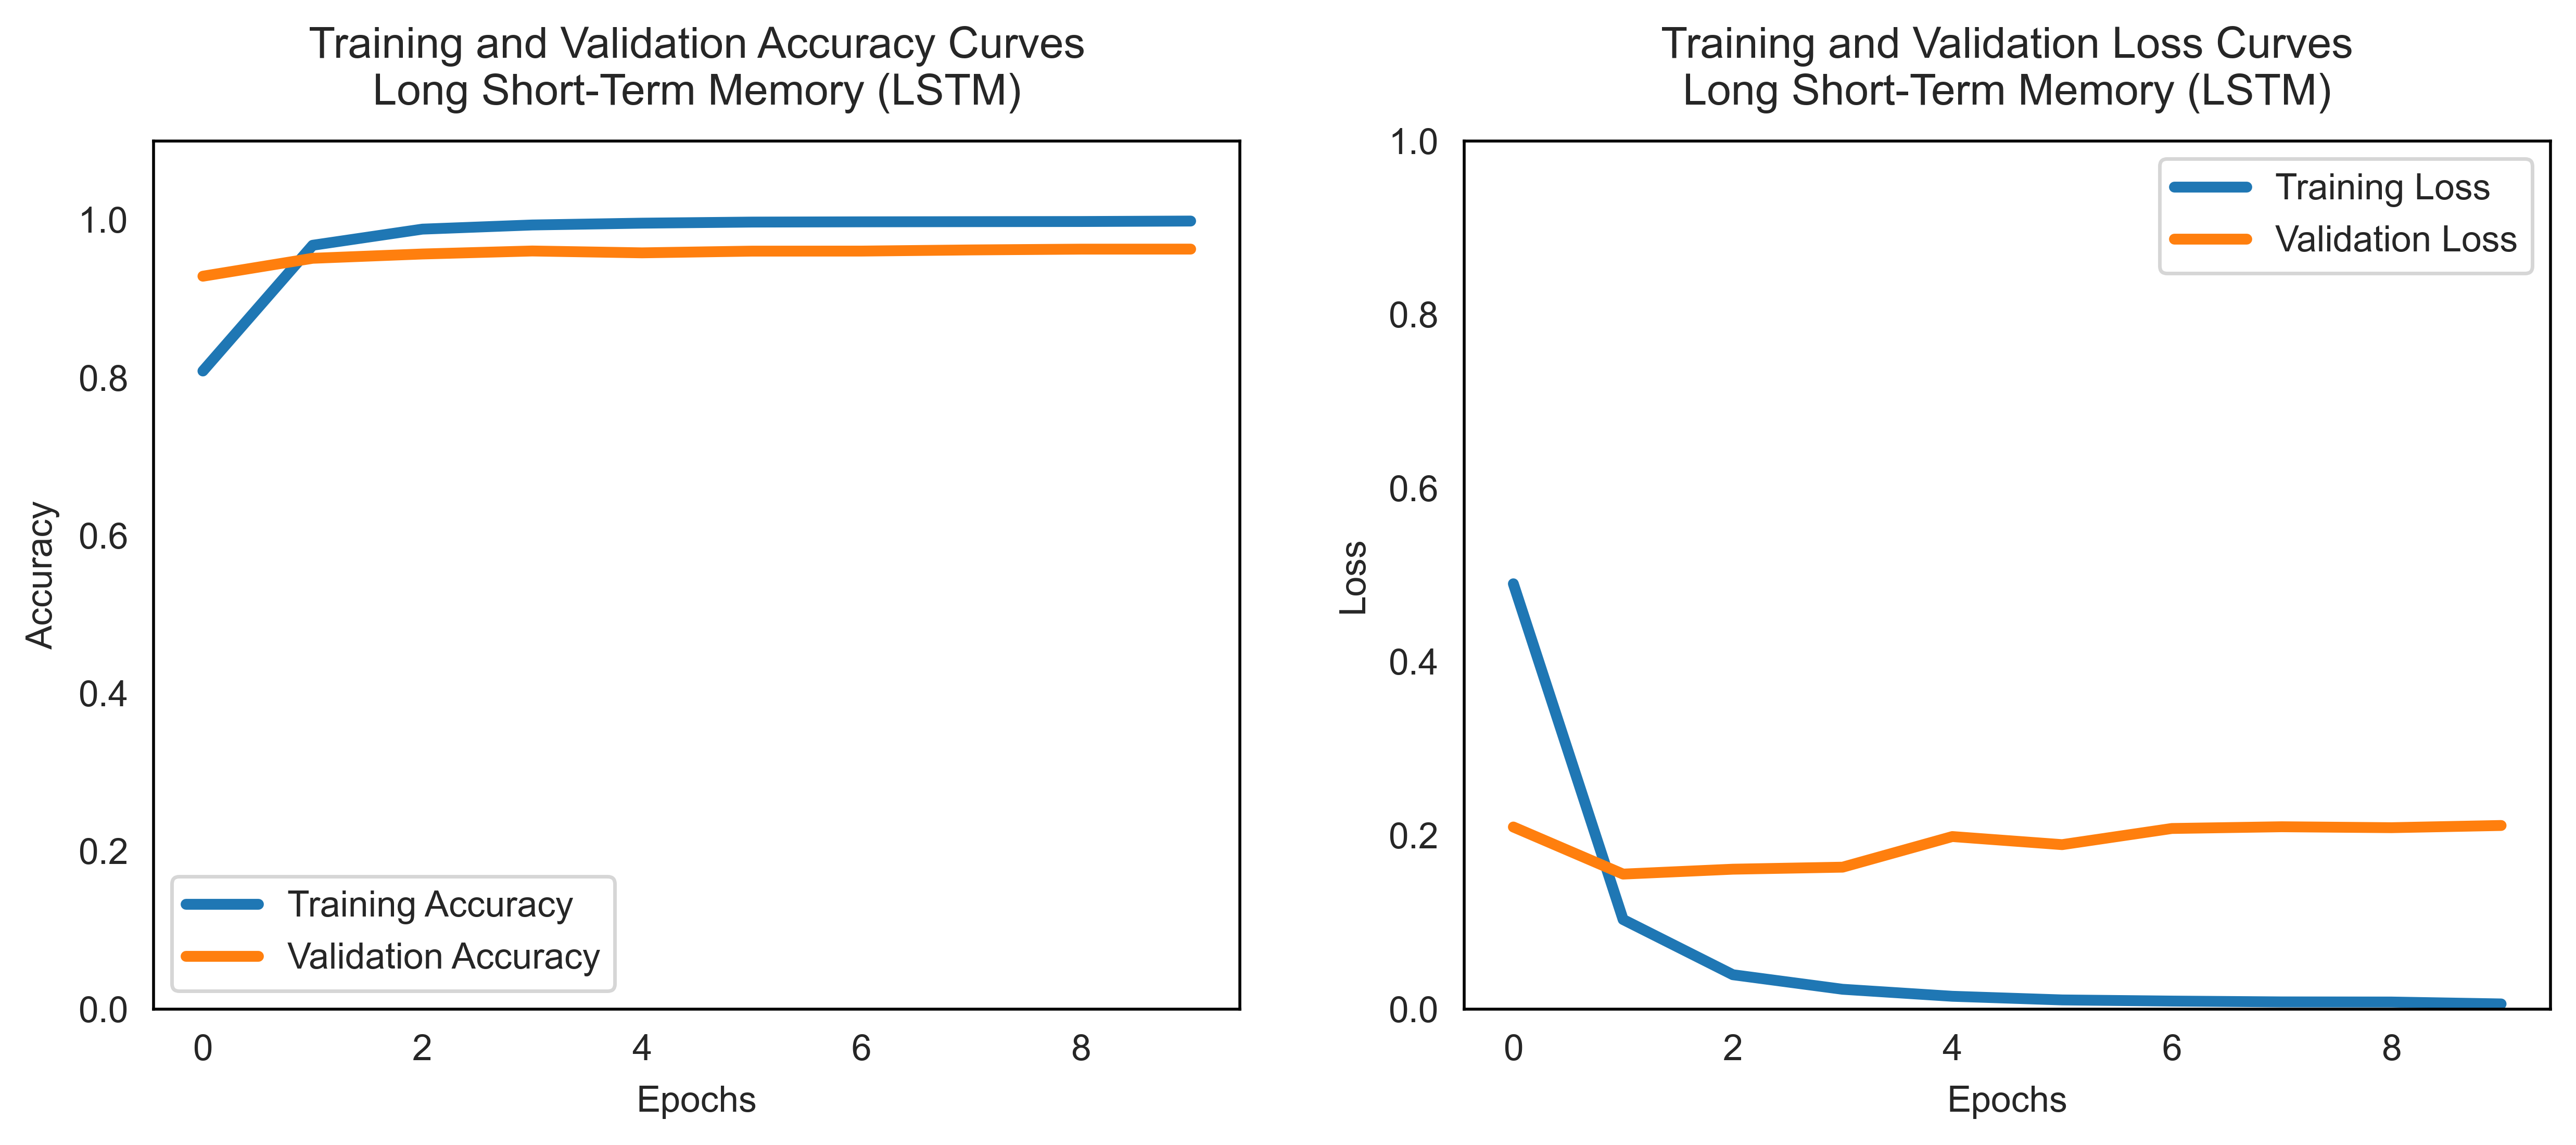

In [17]:
# Plotting model accuracy and loss
plt.figure(figsize=(10, 4.5))

model = "Long Short-Term Memory (LSTM)"

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(mean_accuracy, label='Training Accuracy', linewidth=3)
plt.plot(mean_val_accuracy, label='Validation Accuracy', linewidth=3)
plt.title(f'Training and Validation Accuracy Curves\n{model}', fontsize=12, pad=10)
plt.ylabel('Accuracy', labelpad=5)
plt.xlabel('Epochs', labelpad=5)
plt.ylim(0, 1.1)  # Setting y-axis scale from 0 to 1
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(mean_loss, label='Training Loss', linewidth=3)
plt.plot(mean_val_loss, label='Validation Loss', linewidth=3)
plt.title(f'Training and Validation Loss Curves\n{model}', fontsize=12, pad=10)
plt.ylabel('Loss', labelpad=5)
plt.xlabel('Epochs', labelpad=5)
plt.ylim(0, 1)  # Setting y-axis scale from 0 to 1
plt.legend()

plt.subplots_adjust(wspace=3)  # Adjust the width space between subplots

# make all borders of plots black
for ax in plt.gcf().get_axes():
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

plt.tight_layout()

plt.savefig(f"../Figs/{model}_DS1_Accuracy_Loss_Folds.pdf")

plt.show()